In [1]:
pip install pillow 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image

image = Image.open(r"C:\Users\Balodi\Downloads\img\thyroid .jpg")

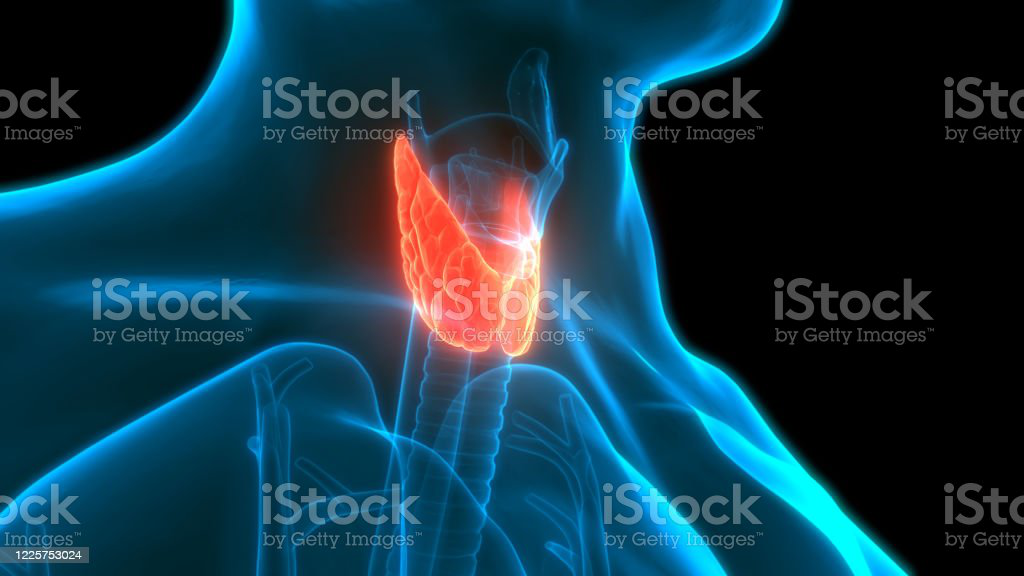

In [5]:
image

# Thyroid Disease Detection 

### 1) Problem statement.

### Data: Thyroid dataset

Problem Statement:
Thyroid disease is a common cause of medical diagnosis and prediction, with an onset
that is difficult to forecast in medical research. The thyroid gland is one of our body's
most vital organs. Thyroid hormone releases are responsible for metabolic regulation.
Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid
that releases thyroid hormones in regulating the rate of body's metabolism.

- Given features are combiningly/relatively give us better result for the disease.
  So we will apply ensemble techniques.

- The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid
  disease or not.

### Data Set Information:

- From Garavan Institute
- Documentation: as given by Ross Quinlan
- 6 databases from the Garavan Institute in Sydney, Australia
- Approximately the following for each database:
- 2800 training (data) instances and 972 test instances
- Plenty of missing data
- 29 or so attributes, either Boolean or continuously-valued
- 2 additional databases, also from Ross Quinlan, are also here
- Hypothyroid.data and sick-euthyroid.data
- Quinlan believes that these databases have been corrupted
- Their format is highly similar to the other databases
- 1 more database of 9172 instances that cover 20 classes, and a related domain theory
- Another thyroid database from Stefan Aeberhard
- 3 classes, 215 instances, 5 attributes
- No missing values



### Feature Information:

age: Age of the patient

sex: Sex of the patient

- Thyroxine controls how much energy your body uses (the metabolic rate). It's also involved in digestion, how your heart and muscles work, brain development and bone health. When the thyroid gland does not make enough thyroxine (called hypothyroidism), many of the body's functions slow down.

on thyroxine: Having thyroxine problem or not?

query on thyroxine: Has query on thyroxine ?

on antithyroid medication: Medication is going on or not ?

sick: Sick or not ?

pregnant: Pregnant or not ?

thyroid surgery: Have thyroid surgery or not ?

- l131: I-131 is used in medicine to diagnose and treat cancers of the thyroid gland.

I131 treatment: If having l131 treatment ?

query hypothyroid: Has query on hypothyroid?

query hyperthyroid: Has query on hypothyroid ?

- lithium: Lithium may cause hyperthyroidism due to thyroiditis or rarely Graves' disease. As lithium inhibits thyroid hormone release from the thyroid gland it can be used as an adjunct therapy in the management of severe hyperthyroidism.

lithium: Having lithium theraphy ?

- goitre: A goiter is typically not dangerous, unless the underlying cause of thyroid enlargement is a thyroid cancer.

goitre: Having hoitre or not ?

tumor: Having tumor ?

- hypopituitary: In hypopituitarism, there is an absence of one or more pituitary hormones. Lack of the hormone leads to loss of function in the gland or organ that it controls.

hypopituitary: Having hypopituitary ?

- psych: The more severe the thyroid disease, the more severe the mood changes(anxiety or depression).

psych: Having psychiatric problems?

TSH measured: Measured ?

- TSH: TSH stands for thyroid stimulating hormone. A TSH test is a blood test that measures this hormone. TSH levels that are too high or too low may be a sign of a thyroid problem. The thyroid is a small, butterfly-shaped gland in the front of your neck. TSH normal values are 0.5 to 5.0 mIU/L.

T3 measured: Measured ?
    
- T3: A T3 test is most often used to diagnose hyperthyroidism, a condition in which the body makes too much thyroid hormone. T3 tests are frequently ordered with T4 and TSH (thyroid stimulating hormone) tests. A T3 test may also be used to monitor treatment for thyroid disease. The range for normal values are: Total T3 -- 60 to 180 nanograms per deciliter (ng/dL), or 0.9 to 2.8 nanomoles per liter (nmol/L)

TT4 measured: Measured ?

- TT4: Thyroxine, also known as T4, is a type of thyroid hormone. A T4 test measures the level of T4 in your blood. Too much or too little T4 can be a sign of thyroid disease. There are two forms of T4 in your blood: Free T4 is the active form of thyroxine hormone that enters your tissues where it's needed. A typical normal range is 0.9 to 2.3 nanograms per deciliter (ng/dL), or 12 to 30 picomoles per liter (pmol/L).

T4U measured: Measured ?

- T4U: T4 results that are higher than normal may be a sign of: Hyperthyroidism, which may be caused by Graves disease or another medical condition that causes your thyroid to make too much T4. Thyroiditis (thyroid inflammation) Toxic goiter (an enlarged thyroid with areas that make extra thyroid hormone)

FTI measured: Measured ?

- FTI: Free thyroxine index is calculated by dividing the total T4 by the TBI value (T-uptake ratio). Interassay precision (CV) is <5%. Reference range for T-uptake ratio is 0.7–1.2 and for FTI is 6–11.00 μg/dL. The FTI is a normalized determination that remains relatively constant in healthy individuals and compensates for abnormal levels of binding proteins. Hyperthyroidism causes increased FTI, and hypothyroidism causes decreased values.

TBG measured: Measured ?

- TBG: Thyroxine binding globulin. The TBG blood test measures the level of a protein that moves thyroid hormone throughout your body. 

referral source: Source of referral 

binaryClass: Output as P and N


### 2) Import required libraries

In [1]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statistics import mean
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

### Read the data

In [3]:
# Load csv file
data = pd.read_csv(r'C:\Users\Balodi\Desktop\DATASET\hypothyroid.csv')

In [4]:
df = data.copy()

In [5]:
# Top 5 rows
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [6]:
# Last 5 rows
df.tail()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,P


In [7]:
# check the data size
df.shape

(3772, 30)

Report:
- There are 30 columns and 3772 records present in the dataset

### column names of the dataset

In [8]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [9]:
# Check unique values of target varaible
df['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 30 categorical features : ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'binaryClass']


##### Checking duplicate columns

In [11]:
df.duplicated().sum()

61

##### Report:
- There are 61 duplicate records.

##### Dropping duplicates

In [12]:
df.drop_duplicates(keep = False, inplace=True)

In [13]:
df.duplicated().sum()

0

##### Report:
- All duplicate vaues got dropped.

##### Checking null values

In [14]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

##### Report:
- There are 0 null values.

##### Cheking the datatypes of each feature

In [15]:
df.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

#### Report:
- All features are of object type, we need to change the type of numeric data columns.

##### Basic information of dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3678 non-null   object
 1   sex                        3678 non-null   object
 2   on thyroxine               3678 non-null   object
 3   query on thyroxine         3678 non-null   object
 4   on antithyroid medication  3678 non-null   object
 5   sick                       3678 non-null   object
 6   pregnant                   3678 non-null   object
 7   thyroid surgery            3678 non-null   object
 8   I131 treatment             3678 non-null   object
 9   query hypothyroid          3678 non-null   object
 10  query hyperthyroid         3678 non-null   object
 11  lithium                    3678 non-null   object
 12  goitre                     3678 non-null   object
 13  tumor                      3678 non-null   object
 14  hypopitu

In [17]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


#### Report:
- We can observe there are missing values displayed represented in '?'
- Replacing them with NAN

##### replacing '?' values to NAN

In [18]:
df.replace('?',np.nan,inplace=True)


##### Checking missing values

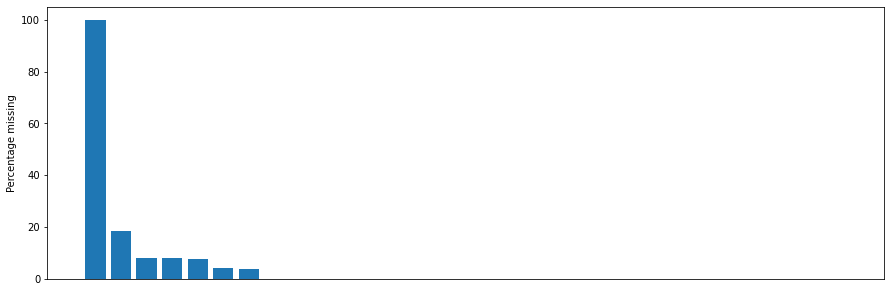

In [19]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [20]:
df.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,P


In [21]:
df.isnull().sum()

age                             1
sex                           148
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           277
T3 measured                     0
T3                            677
TT4 measured                    0
TT4                           139
T4U measured                    0
T4U                           295
FTI measured                    0
FTI                           293
TBG measured                    0
TBG                          3678
referral source                 0
binaryClass   

### Dropping Columns which has more than 20% of missing values.

In [22]:
missing[missing[0]>20]

,0
TBG,100.0


#### drop unnecessary colomns

In [23]:
df.drop(['TBG','TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured'], axis=1, inplace=True)

#### change the data type

In [24]:
#df['age'] = df['age'].astype(float)

In [25]:
#df['sex'] = df['sex'].astype(str)

### replacing null value with mean

In [26]:
#df['age'] = df['age'].fillna(df['age'].mean())

#### Checking the shape of the data after dropping the columns

In [27]:
df.shape

(3678, 23)

In [28]:
df = df.replace({'f':0, 't':1})

In [29]:
df.head(2)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,P


In [30]:
df['binaryClass'].value_counts()

P    3387
N     291
Name: binaryClass, dtype: int64

In [31]:
df['binaryClass'] = df['binaryClass'].replace({'N':0, 'P':1})

In [32]:
df['binaryClass'].head()

0    1
1    1
2    1
3    1
4    1
Name: binaryClass, dtype: int64

##### Replacing N with 0 and P with 1

#### One-hot encoding

In [33]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,1
1,23,F,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,1
2,46,M,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,1
3,70,F,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,1
4,70,F,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,1


In [34]:
#cat_cols = df.select_dtypes(include=['object']).columns

In [35]:
# perform one-hot encoding on each categorical column
#for col in cat_cols:
 #   one_hot = pd.get_dummies(df[col], prefix=col)
 #   df = df.drop(col, axis=1)
 #   df = df.join(one_hot)
 # 

In [36]:
df = pd.get_dummies(df, columns=['referral source'])

In [37]:


df.head(3)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,binaryClass,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41,F,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23,F,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46,M,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1


In [38]:
df['sex'].value_counts()

F    2396
M    1134
Name: sex, dtype: int64

In [39]:
df['sex'] = df['sex'].replace({'F':0, 'M':1})

In [40]:
obj_cols = df.columns[df.dtypes.eq('O')]
df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors='coerce') # ignore errors
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
binaryClass                    int64
referral source_STMW           uint8
referral source_SVHC           uint8
referral source_SVHD           uint8
referral source_SVI            uint8
referral source_other          uint8
d

### Explore data analysis 

##### age column

<AxesSubplot:xlabel='age', ylabel='Density'>

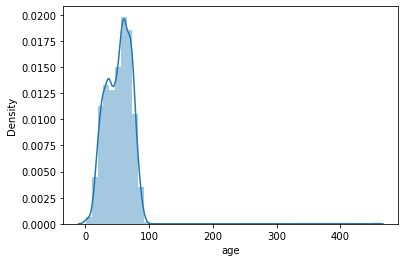

In [41]:
# univariate analysis 
sns.distplot(df['age'])

In [42]:
df.age

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
3767    30.0
3768    68.0
3769    74.0
3770    72.0
3771    64.0
Name: age, Length: 3678, dtype: float64

In [43]:
df.sex

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3767    0.0
3768    0.0
3769    0.0
3770    1.0
3771    0.0
Name: sex, Length: 3678, dtype: float64

<AxesSubplot:xlabel='age'>

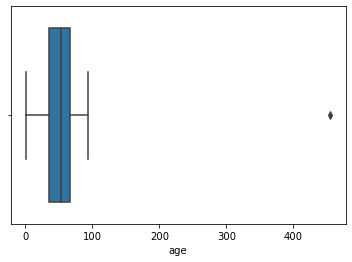

In [44]:
sns.boxplot(df['age'])

#### Report:
- There is an outier in the right side of the distribution

#### sex columns

Text(0.5, 1.0, 'Feature name : sex')

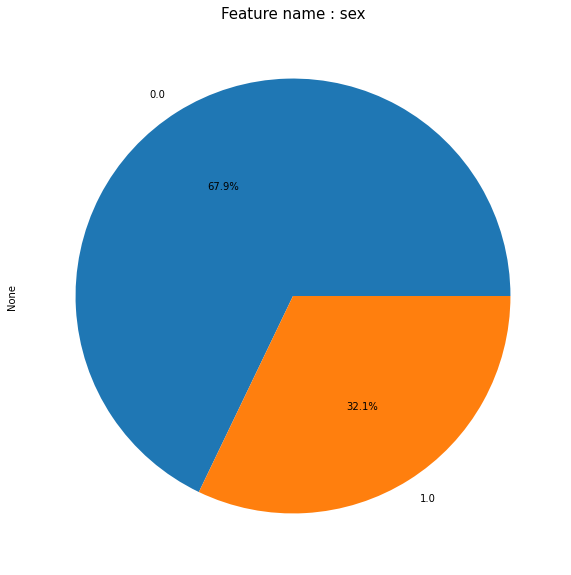

In [45]:
plt.figure(figsize=(20,10))
df.value_counts('sex').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : sex", fontsize = 15)

##### Report 
- In the population 67 percent female and 32 percent Male

#### sick columns 

Text(0.5, 1.0, 'Feature name : sick')

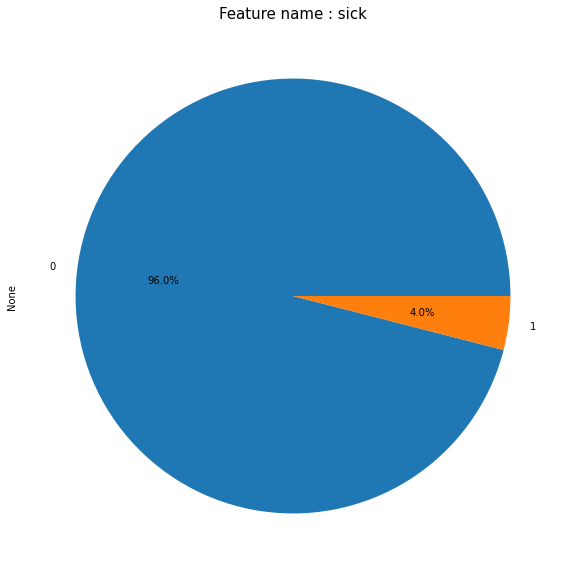

In [48]:
plt.figure(figsize=(20,10))
df.value_counts('sick').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : sick", fontsize = 15)

##### Report 
- 4.2%  population are sick

#### pregnant columns

Text(0.5, 1.0, 'not-pregnant: 0, pregnant: 1')

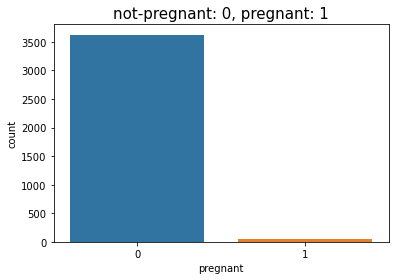

In [50]:
sns.countplot('pregnant', data=df, palette="tab10")
plt.title('not-pregnant: 0, pregnant: 1', fontsize=15)

Text(0.5, 1.0, 'features name : pregnant')

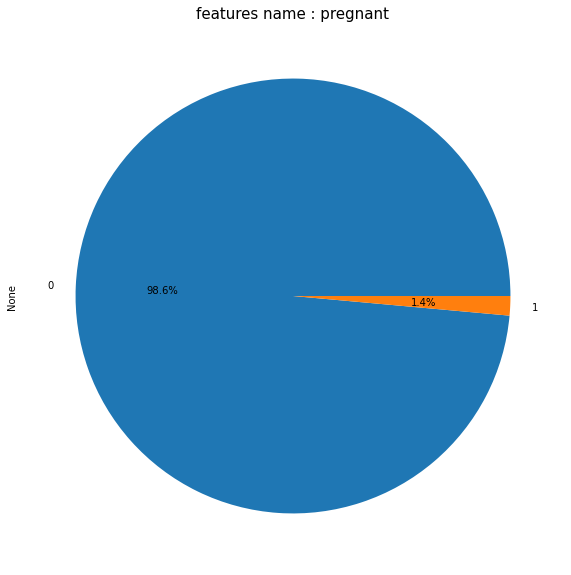

In [52]:
plt.figure(figsize=(20,10))
df.value_counts('pregnant').plot(kind='pie',autopct = '%1.1f%%')
plt.title("features name : pregnant" , fontsize = 15)

Text(0.5, 1.0, 'thyroid surgery')

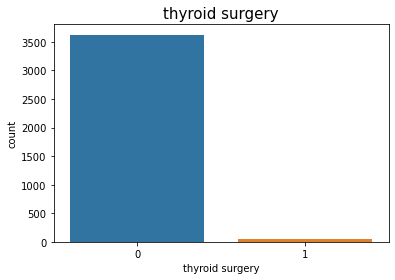

In [54]:
sns.countplot('thyroid surgery', data=df, palette="tab10")
plt.title('thyroid surgery', fontsize=15)

In [55]:
len(df[df['thyroid surgery'] == 1])/len(df['thyroid surgery'])*100

1.44100054377379

#### Report:
- 1.44% people got thyroid surgery.

Text(0.5, 1.0, 'Feature name : I131 treatment')

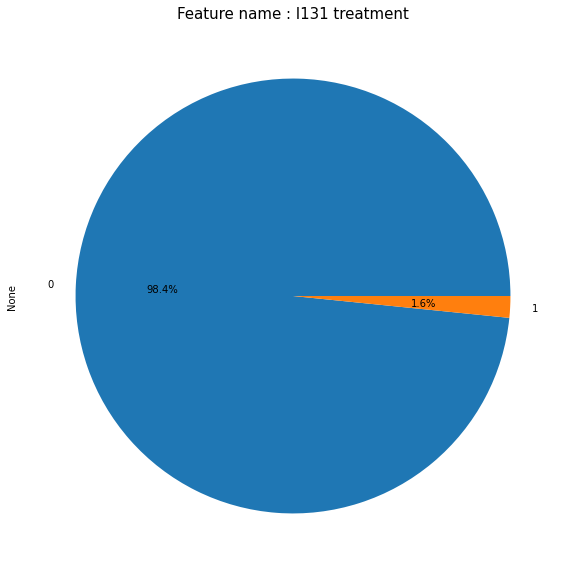

In [56]:
plt.figure(figsize=(20,10))
df.value_counts('I131 treatment').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : I131 treatment", fontsize = 15)

#### Report:
- 1.6% of population have treatment with I131

Text(0.5, 1.0, 'lithium')

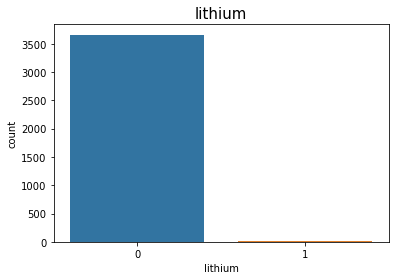

In [57]:
sns.countplot('lithium', data=df, palette="tab10")
plt.title('lithium', fontsize=15)

Text(0.5, 1.0, 'Feature name : tumor')

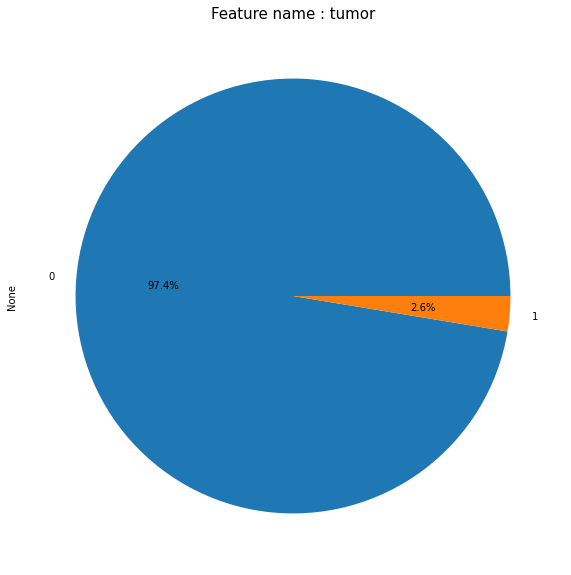

In [58]:
plt.figure(figsize=(20,10))
df.value_counts('tumor').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : tumor", fontsize = 15)

#### Report:
- 2.2% of population have tumor

In [59]:
df['age'].median()

54.0

##### Replacing the null values of age column with median

In [60]:
df['age'] = df['age'].replace(np.nan, df['age'].median())
df['age'].isna().sum()

0

In [61]:
df['sex'].value_counts()

0.0    2396
1.0    1134
Name: sex, dtype: int64

#### Replacing the null values of sex column with mode

In [62]:
df['sex'] = df['sex'].replace(np.nan, df['sex'].mode()[0])
df['sex'].isna().sum()

0

In [63]:
df.isna().sum().sum()

1681

#### Report:
- There are 0 null value in the dataset

### Replacing outliers of age column with madian

##### As there is only one outlier, finding the second max value in age

In [64]:
df[df['age'].max() > df['age']]['age'].max()

94.0

In [65]:
median = df.loc[df['age']<94, 'age'].median()
df.loc[df.age > 94, 'age'] = np.nan
df.fillna(median,inplace=True)

<AxesSubplot:xlabel='age'>

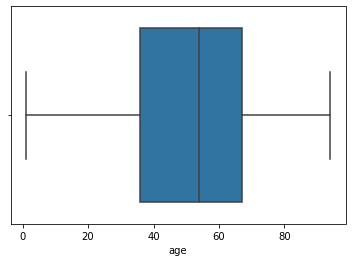

In [66]:
sns.boxplot(df['age'])

### Report:
- Outlier from age column handled

### visualization of binaryClass

Text(0.5, 1.0, 'binaryClasses')

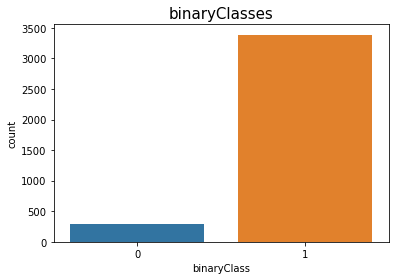

In [67]:
sns.countplot('binaryClass', data=df, palette="tab10")
plt.title('binaryClasses', fontsize=15)

Text(0.5, 1.0, 'Feature name : binaryClass')

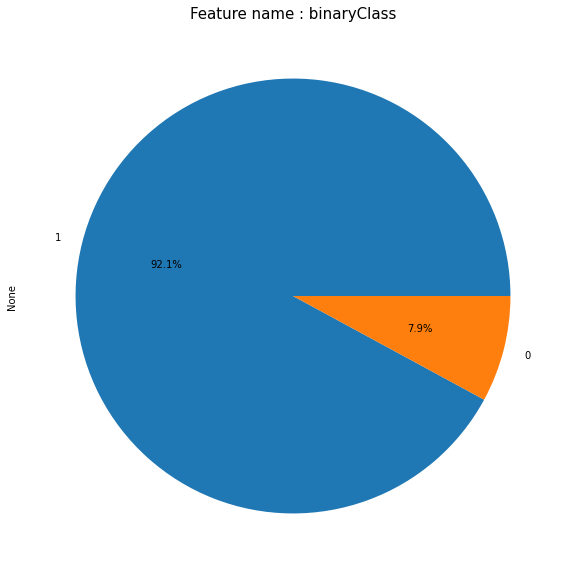

In [68]:
plt.figure(figsize=(20,10))
df.value_counts('binaryClass').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : binaryClass", fontsize = 15)

#### Report:
- The output class has un-even distribution
- From whole population 91.9% are thyroid positive patient.

- #### How to handle Imbalance Data ?

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

 - SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [70]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,binaryClass,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41.0,0.0,0,0,0,0,0,0,0,0,...,2.5,125.0,1.14,109.0,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,2.0,102.0,54.00,54.0,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,54.0,109.0,0.91,120.0,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1.9,175.0,54.00,54.0,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1.2,61.0,0.87,70.0,1,0,0,0,1,0


##### create Independent and dependent variable 

In [71]:
X = df.drop('binaryClass', axis=1)

y = y = df.binaryClass

#### Create Functions for model training and evaluation

In [127]:
def evaluate_clf(true , predicted):
    '''
    This function in takes in true value and predicted value 
    Returns: Accuracy , F1_score , Precision , Recall , Roc-auc Score
    '''
    acc = accuracy_score(true , predicted) #calculated accuracy
    f1 = f1_score(true , predicted) #calculated f1_score
    precision = precision_score(true , predicted) #calculated Precision
    recall = recall_score(true , predicted) #calculated recall
    roc_auc = roc_auc_score(true , predicted) #calculated Roc
    return acc , f1 ,recall , precision ,roc_auc

 ##### Create a function which can evaluate models and return a report 

In [128]:
# Create a function which can evaluate models and return a report 

def evaluate_models(X, y, models):
    '''
    This function takes in X, y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]  # Iterting through each model 
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score = evaluate_clf(y_train ,y_train_pred)

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"])
        
    return report

### Experiment: 1 = KNN Imputer for Null values

- ###### Why KNN Imputer?

- KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being       observed as a replacement for traditional imputation techniques.
- KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
- Here we Iterates through different K values and get accuracy and choose best K values.

##### Finding the optimal n_neighbour value for KNN imputer

In [129]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.9394)
n_neighbors= 3 || accuracy (0.9394)
n_neighbors= 5 || accuracy (0.9394)
n_neighbors= 7 || accuracy (0.9394)
n_neighbors= 9 || accuracy (0.9394)


###### We can observe accuracy of all the above n values same  accuracy

##### Pipeline for KNN imputer

In [130]:
# Fit the KNN imputer with selected K-value

In [131]:
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))])

In [132]:
X_knn = knn_pipeline.fit_transform(X)

### Handling Imbalanced data
- **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

- .This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

- . To add new data of minority class

 1.Choose random data from the minority class.
 
 2.Calculate the distance between the random data and its k nearest neighbors.
 
 3.Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 
 4.Repeat step number 2–3 until the desired proportion of minority class is met.
 
- To remove the tomek links of the majority class
 1.Choose random data from the majority class.
 
 2.If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
- This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [133]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [134]:
len(X), len(y), len(X_res), len(y_res)

(3678, 3678, 6756, 6756)

In [135]:
df_smote= pd.DataFrame(y_res)

In [136]:
df_smote['binaryClass'].value_counts()

1    3378
0    3378
Name: binaryClass, dtype: int64

### Initialize Default Models in a dictionary

In [137]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

#### Fit KNN imputed data for models in dictionary

In [138]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9978
- F1 score: 0.9978
- Precision: 0.9956
- Recall: 1.0000
- Roc Auc Score: 0.9978


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9996
- Recall: 1.0000
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Logistic Regression
Model performance for Training 

**Insights**
- For the Experiment 1: Knn imputer, has Random Forest Classifier , Decision Tree and XGBoost classifier as the best Model
- Proceeding with further experiments 

## Experiment: 2 = Simple Imputer with Strategy Median
- SimpleImputer is a class in the sklearn.impute module that can be used to replace missing values in a dataset, using a variety of input strategies.

- Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified columns.

In [140]:
# Fit the Simple imputer with strategy median

median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [141]:
# Fit X with median_pipeline

X_median = median_pipeline.fit_transform(X)

In [142]:
# Resampling the minority class. The strategy can be changed as required.

smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [143]:
# Training the models and getting report 

report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9978
- F1 score: 0.9978
- Precision: 0.9956
- Recall: 1.0000
- Roc Auc Score: 0.9978


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9996
- Recall: 1.0000
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Logistic Regression
Model performance for Training 

**Insights**
- For the Experiment 2: Simple imputer with median strategy has Random Forest, 
Decision Tree and  XGBClassifier  as the best Model
- Proceeding with further experiments 

## Experiment: 3 = Simple Imputer with Strategy Constant 

- Another strategy which can be used is replacing missing values with a fixed (constant) value.
- To do this, specify “constant” for strategy and specify the fill value using the fill_value parameter

In [145]:
# Create a pipeline with simple imputer with strategy constant and fill value 0

constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0))
])

In [146]:
X_const = constant_pipeline.fit_transform(X)

In [147]:
# Resampling the minority class. The strategy can be changed as required.

smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [148]:
# training the models

report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9978
- F1 score: 0.9978
- Precision: 0.9956
- Recall: 1.0000
- Roc Auc Score: 0.9978


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9996
- Recall: 1.0000
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Logistic Regression
Model performance for Training 

**Insights**
- For the Experiment 3: Simple imputer(constant), has Random Forest Classifier ,Decision Tree and XGBoost classifier as the best Model
- Proceeding with further experiments 

## Experiment: 4 = Simple Imputer with Strategy Mean

- Another strategy which can be used is replacing missing values with mean
- Here we replace the missing values with the mean of the column

In [150]:
# Create a pipeline with Simple imputer with strategy mean

mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean'))
])

In [151]:
X_mean = mean_pipeline.fit_transform(X)

In [152]:
# Resampling the minority class. The strategy can be changed as required.

smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [153]:
# Training the models and getting report 

report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9978
- F1 score: 0.9978
- Precision: 0.9956
- Recall: 1.0000
- Roc Auc Score: 0.9978


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9996
- Recall: 1.0000
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9971
- Recall: 1.0000
- Roc Auc Score: 0.9985


Logistic Regression
Model performance for Training 

**Insights**

- For the Experiment 4: Simple imputer(median), has Random Forest Classifier,Decision Tree and XGBoost classifier as the best Model
- Proceeding with further experiments 

## Experiment: 5 = Principle component analysis with imputing median

In [154]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0))
])

In [155]:
X_pca = pca_pipeline.fit_transform(X)

In [156]:
#Applying PCA
from sklearn.decomposition import PCA


var_ratio={}
for n in range(2,27):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

#### Variance Plot

<AxesSubplot:>

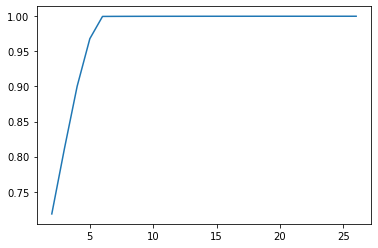

In [157]:
# plotting variance ratio

pd.Series(var_ratio).plot()

#### Kneed algorithm to find the elbow point

In [158]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Figure size 360x360 with 0 Axes>

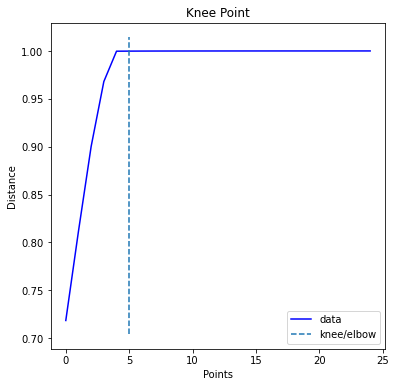

Knee Locator k = 7


In [159]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [160]:
 #Reducing the dimensions of the data 

pca_final=PCA(n_components=7, random_state=42).fit(X_res)

reduced_X =pca_final.fit_transform(X_pca)

In [161]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced_X, y)

In [162]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9800
- F1 score: 0.9801
- Precision: 0.9765
- Recall: 0.9837
- Roc Auc Score: 0.9801


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9608
- F1 score: 0.9608
- Precision: 0.9559
- Recall: 0.9658
- Roc Auc Score: 0.9608


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9741
- F1 score: 0.9739
- Precision: 0.9689
- Recall: 0.9790
- Roc Auc Score: 0.9741
----------------------------------
Model performance for Test set
- Accuracy: 0.9586
- F1 score: 0.9585
- Precision: 0.9500
- Recall: 0.9671
- Roc Auc Score: 0.9586


Logistic Regression
Model performance for Training 

## Final Model

In [164]:
pip install PrettyTable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [165]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Model_Score"]
pt.add_row(["Random Forest","KNN imputer","99.85%"])
pt.add_row(["XGBClassifier","KNN imputer","99.85%"])
pt.add_row(["Random Forest","Simple Imputer(median)","99.85%"])
pt.add_row(["XGBClassifier","Simple Imputer(median)","99.85%"])
pt.add_row(["Random Forest","Simple Imputer(Constant)","99.85%"])
pt.add_row(["XGBClassifier","Simple Imputer(Constant)","99.85%"])
pt.add_row(["Random Forest","Simple Imputer(Mean)","99.85%"])
pt.add_row(["XGBClassifier","Simple Imputer(Mean)","99.85%"])
pt.add_row(["Random Forest","Principle component(SimpleImputer-median)","97.93%"])
pt.add_row(["XGBClassifier","Principle component(SimpleImputer-median)","98.88%"])
print(pt)

+---------------+-------------------------------------------+-------------+
|     Model     |             Imputation_method             | Model_Score |
+---------------+-------------------------------------------+-------------+
| Random Forest |                KNN imputer                |    99.85%   |
| XGBClassifier |                KNN imputer                |    99.85%   |
| Random Forest |           Simple Imputer(median)          |    99.85%   |
| XGBClassifier |           Simple Imputer(median)          |    99.85%   |
| Random Forest |          Simple Imputer(Constant)         |    99.85%   |
| XGBClassifier |          Simple Imputer(Constant)         |    99.85%   |
| Random Forest |            Simple Imputer(Mean)           |    99.85%   |
| XGBClassifier |            Simple Imputer(Mean)           |    99.85%   |
| Random Forest | Principle component(SimpleImputer-median) |    97.93%   |
| XGBClassifier | Principle component(SimpleImputer-median) |    98.88%   |
+-----------

#### Report:
- Hence XGBoost classifier is giving the better accuracy in overall models. And we will use XGBoost Classifier with KNN imputation for the final model.

## Finetuning the Final model and get reports

In [166]:
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)


In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
parameters = {'max_depth': range (2, 10, 1),
              'eta': [0.1, 0.2, 0.3],
              'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.03, 0.05]} 

grid_search = GridSearchCV(estimator=final_model, param_grid=parameters, n_jobs=-1, verbose=3, cv=3)

In [170]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.03, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [171]:
grid_search.best_params_

{'eta': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}

In [172]:
model_with_best_param = XGBClassifier(eta= 0.1, learning_rate= 0.05, max_depth= 4, n_estimators= 300)

In [173]:
model_with_best_param.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [174]:
y_pred = model_with_best_param.predict(X_test)

In [175]:
print("Final XGBoost Classifier Accuracy Score (Train) :", round(model_with_best_param.score(X_train,y_train)*100,2))
print("Final XGBoost Classifier Accuracy Score (Test) :", round(accuracy_score(y_pred,y_test)*100,2))

Final XGBoost Classifier Accuracy Score (Train) : 99.98
Final XGBoost Classifier Accuracy Score (Test) : 99.85


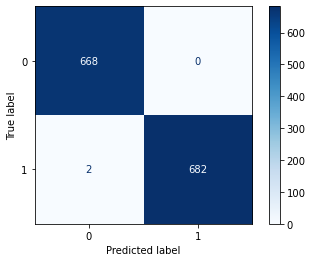

In [176]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(model_with_best_param, X_test, y_test, cmap='Blues', values_format='d')

### Best model is XGBoostClassifier by KNN imputation with 99.85% accuracy.